In [1]:
using IntervalConstraintProgramming, ValidatedNumerics

In [2]:
include("draw_boxes.jl")

INFO: Recompiling stale cache file /Users/dpsanders/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/dpsanders/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Recompiling stale cache file /Users/dpsanders/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


draw (generic function with 13 methods)

In [20]:
x = y = -∞..∞
x = 10..11

[10, 11]

In [21]:
z1 = x^2

[100, 121]

In [22]:
z2 = y^2

[0, ∞]

In [23]:
z3 = z1 + z2

[100, ∞]

In [24]:
z3 = z3 ∩ (0..1)

∅

In [25]:
z1 = z1 ∩ (z3 - z2)

∅

In [26]:
IntervalConstraintProgramming.sqr_rev(z1, x)

∅

In [19]:
macro simple(expr)
    @show expr
    return nothing
end

In [2]:
@simple 1 <= x^2 + y^2 <= 3

expr = :(1 <= x ^ 2 + y ^ 2 <= 3)


In [5]:
S1 = @constraint 1 <= x^2 + y^2 <= 3

Separator:
- variables: x, y
- expression: x ^ 2 + y ^ 2 ∈ [1, 3]


In [21]:
function draw(inner)
    draw_boxes(inner, "green", 0.5)
    axis("image")
end

function draw(inner, boundary)
    draw_boxes(inner, "green", 0.5)
    draw_boxes(boundary, "gray", 0.5)
    axis("image")
end

draw (generic function with 15 methods)

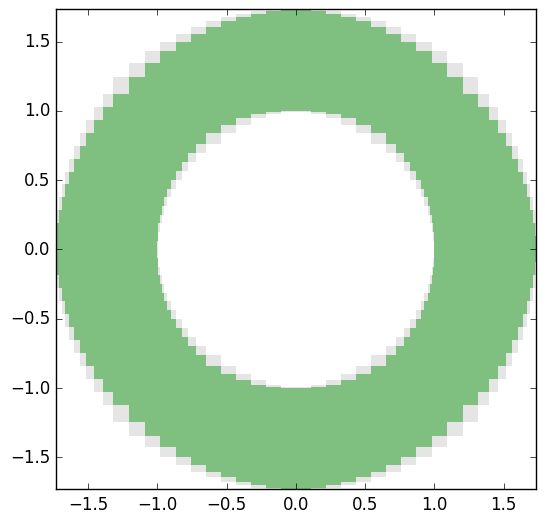

(-1.7320508075688776,1.7320508075688767,-1.7320508075688772,1.7320508075688772)

In [6]:
X = IntervalBox(-100..100, -100..100)
paving = pave(S1, X, ldexp(1., -3))
draw(paving)

In [7]:
Vol(paving)

2-dimensional area: [5.9714, 6.59028]

In [8]:
refine!(paving, ldexp(1.,-4))

0.0625

In [9]:
Vol(paving)

2-dimensional area: [6.12788, 6.43732]

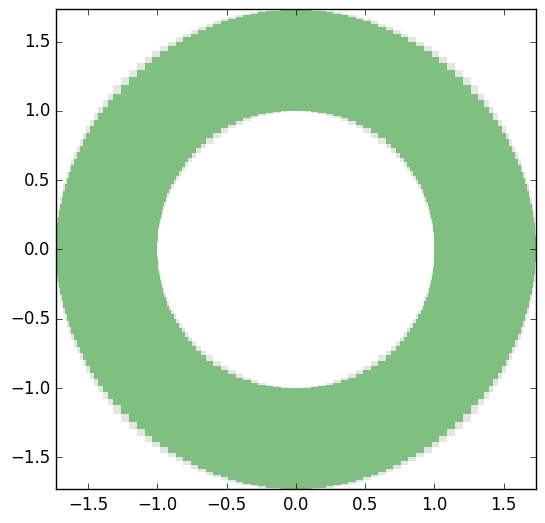

(-1.7320508075688776,1.732050807568878,-1.7320508075688774,1.7320508075688772)

In [10]:
draw(paving)

In [26]:
Vol(paving)

2-dimensional area: [6.12788, 6.43732]

In [12]:
@time inner, boundary = pave(S1, X, ldexp(1., -6));


  0.209378 seconds (1.57 M allocations: 46.505 MB, 13.95% gc time)


In [23]:
pygui(true)

true

In [26]:
ion()
clf()
for n in 1:length(inner)
    draw_boxes(inner[n:n+1], "green", 0.2)
    sleep(0.1)
    axis("image")
    
end

In [6]:
inner

0-element Array{ValidatedNumerics.IntervalBox{2,Float64},1}

In [14]:
area(X::IntervalBox) = prod(map(diam, X))

function area(inner, boundary)
    lower = sum(map(area, inner))
    upper = lower + sum(map(area, boundary)) 
    return hull(lower, upper)
end

area (generic function with 2 methods)

Calculate area of inner and boundary pavings:

In [15]:
X = IntervalBox(-2..2, -2..2)

for i in 2:10

    @time inner, boundary = pave(S1, X, ldexp(1., -i))
    @show i, area(inner, boundary), length(inner), length(boundary)
end

  0.011396 seconds (100.93 k allocations: 2.994 MB)
(i,area(inner,boundary),length(inner),length(boundary)) = (2,[2.92837, 3.31564],32,36)
  0.031480 seconds (199.37 k allocations: 5.916 MB, 28.09% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (3,[3.03985, 3.2335],68,72)
  0.045924 seconds (395.38 k allocations: 11.731 MB)
(i,area(inner,boundary),length(inner),length(boundary)) = (4,[3.09195, 3.18877],140,144)
  0.101517 seconds (786.51 k allocations: 23.331 MB, 13.77% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (5,[3.11708, 3.16549],284,288)
  0.217646 seconds (1.57 M allocations: 46.505 MB, 14.10% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (6,[3.12941, 3.15362],572,576)
  0.432683 seconds (3.13 M allocations: 92.826 MB, 16.19% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (7,[3.13552, 3.14763],1148,1152)
  0.821639 seconds (6.25 M allocations: 185.441 MB, 13.69% gc time)
(i,area(inner,boundary),l

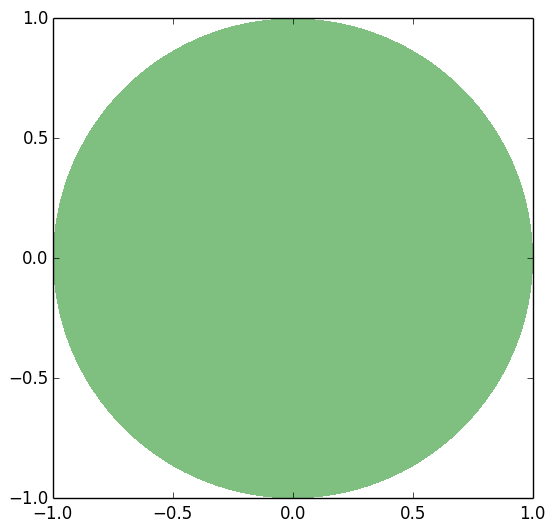

(-0.999998569487502,0.9999985694875023,-0.9999995231627279,0.9999995231627279)

In [13]:
draw(inner)

In [19]:
length(inner)

8628

  1.848361 seconds (6.32 M allocations: 211.844 MB, 5.36% gc time)


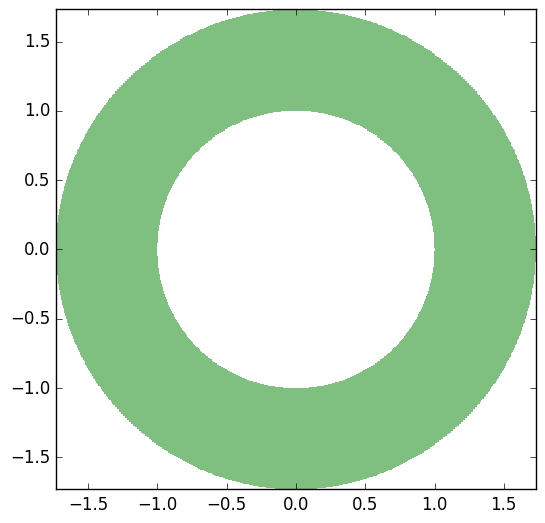

(-1.7320111636183058,1.7320111636183055,-1.731997948766467,1.731997948766467)

In [6]:
X = IntervalBox(-100..100, -100..100)
S2 = @constraint 1 <= x^2 + y^2 <= 3
@time inner, boundary = pave(S2, X, ldexp(1., -6))
draw(inner)

In [35]:
@time inner, boundary = pave(S2, X, ldexp(1., -3));

  0.105208 seconds (625.90 k allocations: 18.664 MB, 29.18% gc time)


## Animation 

In [9]:
pygui(true)

true

In [33]:
ion()
for n in 1:length(inner)
    draw_boxes([inner[n]], "green", 0.2, 1)
    draw_boxes([boundary[n]], "grey", 0.2, 0.1)
    
    sleep(0.00001)
    if n==1
        axis("image")
        xlim(-2, 2)
        ylim(-2, 2)
    end
    show()
end

2016-05-24 00:05:17.068 julia[37236:279254] setCanCycle: is deprecated.  Please use setCollectionBehavior instead
2016-05-24 00:05:17.075 julia[37236:279254] setCanCycle: is deprecated.  Please use setCollectionBehavior instead


In [27]:
length(inner)

336

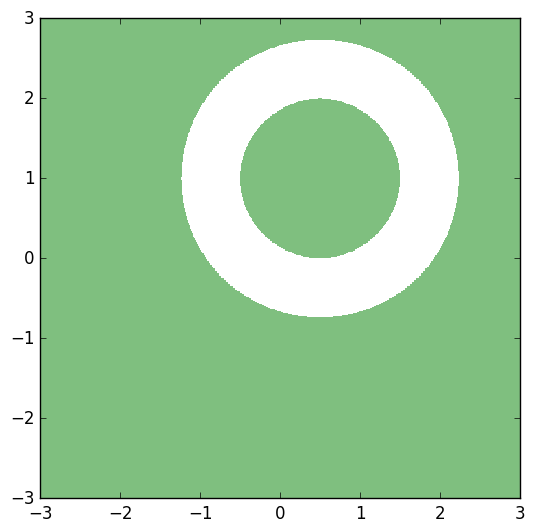

(-3.0,3.0,-3.0,3.0)

In [12]:
S3 =  @constraint 1 <= (x-0.5)^2 + (y-1)^2 <= 3
S3c = !S3  # complement

Y = IntervalBox(-3..3, -3..3)
inner, boundary = pave(S3c, Y, ldexp(1., -5))
draw(inner)


In [16]:
setprecision(Interval, Float64)
X = IntervalBox(-3..3, -3..4)
S2 = @constraint 1 <= x^2 + y^2 <= 3
S4 = @constraint 1 <= (x-0.5)^2 + (y-1)^2 <= 3
S24 = S2 ∩ S4

Separator:
  - variables: [:x,:y]

In [17]:
S24(X)

(([-1.23206, 1.73206],[-0.732051, 1.73206]),([-3, 3],[-3, 4]))

  1.137638 seconds (8.54 M allocations: 263.776 MB, 12.41% gc time)


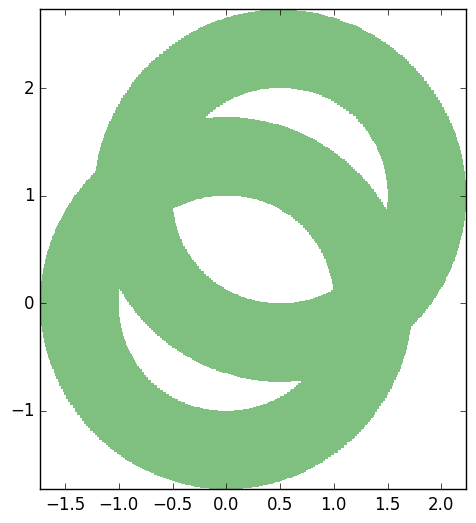

(-1.7320110272625673,2.2320110272625673,-1.7319781879936316,2.7319781879936316)

In [8]:
@time inner, boundary = pave(S24, X, ldexp(1., -5));
#draw(inner, boundary)
draw(inner)
axis("image")

In [9]:
X = IntervalBox(-100..100, -100..100)
S4 = @constraint 1 <= (x-0.5)^2 + (y-1)^2 <= 3
inner, boundary = pave(S4, X, ldexp(1., -3));
#draw(inner)
#axis("image")
;

In [14]:
@time inner, boundary = pave(S4, X, ldexp(1., -3));


  0.110340 seconds (754.47 k allocations: 22.162 MB, 14.32% gc time)


In [10]:
setprecision(Interval, Float64)
X = IntervalBox(-3..3, -3..4)
S2 = @constraint 1 <= x^2 + y^2 <= 3
S4 = @constraint 1 <= (x-0.5)^2 + (y-1)^2 <= 3
S24 = S2 ∩ S4

Separator:
  - variables: [:x,:y]

In [11]:
S24(X)

LoadError: LoadError: MethodError: `getindex` has no method matching getindex(::ValidatedNumerics.IntervalBox{2,Float64}, ::Array{Int64,1})
Closest candidates are:
  getindex{T<:FixedSizeArrays.FixedArray{T,1,Tuple{CARDINALITY}}}(::T<:FixedSizeArrays.FixedArray{T,1,Tuple{CARDINALITY}}, !Matched::Union{Integer,Range{T}})
  getindex(::FixedSizeArrays.FixedArray{T,NDim,SIZE}, !Matched::Tuple)
while loading In[11], in expression starting on line 1

In [10]:
inner, boundary = pave(S24, X, ldexp(1., -2))
draw(inner)
axis("image")

LoadError: LoadError: MethodError: `getindex` has no method matching getindex(::ValidatedNumerics.IntervalBox{2,Float64}, ::Array{Int64,1})
Closest candidates are:
  getindex{T<:FixedSizeArrays.FixedArray{T,1,Tuple{CARDINALITY}}}(::T<:FixedSizeArrays.FixedArray{T,1,Tuple{CARDINALITY}}, !Matched::Union{Integer,Range{T}})
  getindex(::FixedSizeArrays.FixedArray{T,NDim,SIZE}, !Matched::Tuple)
while loading In[10], in expression starting on line 6

In [11]:
S24 = S2 ∩ S4

inner, boundary = pave(S24, X, ldexp(1., -4))
draw(inner)


LoadError: LoadError: MethodError: `getindex` has no method matching getindex(::ValidatedNumerics.IntervalBox{2,Float64}, ::Array{Int64,1})
Closest candidates are:
  getindex{T<:FixedSizeArrays.FixedArray{T,1,Tuple{CARDINALITY}}}(::T<:FixedSizeArrays.FixedArray{T,1,Tuple{CARDINALITY}}, !Matched::Union{Integer,Range{T}})
  getindex(::FixedSizeArrays.FixedArray{T,NDim,SIZE}, !Matched::Tuple)
while loading In[11], in expression starting on line 3

In [12]:
S5a = @constraint 1 >= x+y >= -1
S5b = @constraint x-y >= 1

S5 = S5a ∩ S5b

inner, boundary = pave(S5, X, ldexp(1., -2))
draw(inner)

LoadError: LoadError: MethodError: `getindex` has no method matching getindex(::ValidatedNumerics.IntervalBox{2,Float64}, ::Array{Int64,1})
Closest candidates are:
  getindex{T<:FixedSizeArrays.FixedArray{T,1,Tuple{CARDINALITY}}}(::T<:FixedSizeArrays.FixedArray{T,1,Tuple{CARDINALITY}}, !Matched::Union{Integer,Range{T}})
  getindex(::FixedSizeArrays.FixedArray{T,NDim,SIZE}, !Matched::Tuple)
while loading In[12], in expression starting on line 6

Example from Jaulin et al., "Applied Interval Analysis", pg. 61:

In [16]:
S6 = @constraint x1^2 * (x1^2 - 1) + 4*x2^2 ∈ [-0.1, 0.1]  # 4th power not yet working correctly in powerRev
Y = IntervalBox(-10..10, -10..10)

@time inner, boundary = pave(S6, Y, ldexp(1., -5));


  0.354182 seconds (2.62 M allocations: 79.810 MB, 12.43% gc time)


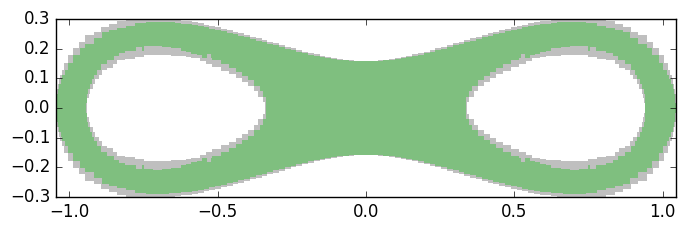

(-1.0449698339937934,1.0449698339937932,-0.3015944517013159,0.30159445170131594)

In [17]:
draw(inner, boundary)

## Combining separators with different variables 

In [1]:
using IntervalConstraintProgramming, ValidatedNumerics


INFO: Recompiling stale cache file /Users/dpsanders/.julia/lib/v0.4/IntervalConstraintProgramming.ji for module IntervalConstraintProgramming.


In [2]:
S7a = @constraint x > 0
S7b = @constraint y > 0
S7 = S7a ∩ S7b

Separator:
  - variables: [:x,:y]

In [3]:
inner, boundary = pave(S7, IntervalBox(-3..3, -3..3), 0.1)

(2-elementArray{ValidatedNumerics.IntervalBox{2,Float64},1}:
 [1.5, 3] × [0, 3]
 [0, 1.5] × [0, 3]
,0-elementArray{ValidatedNumerics.IntervalBox{2,Float64},1}:
)

/Users/dpsanders/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


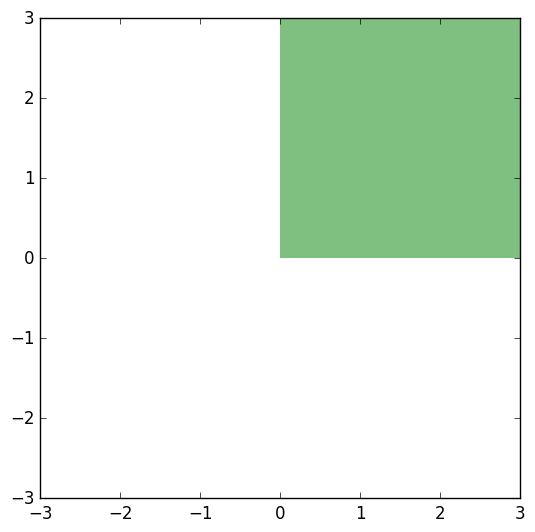

In [4]:
include("draw_boxes.jl")
draw(inner)

xlim(-3, 3)
ylim(-3, 3)
ax = gca()
ax[:set_aspect]("equal")

In [5]:
S8 = S7a ∪ S7b

Separator:
  - variables: [:x,:y]

In [6]:
inner, boundary = pave(S8, IntervalBox(-3..3, -3..3), 0.1)

(2-elementArray{ValidatedNumerics.IntervalBox{2,Float64},1}:
 [-3, 0] × [0, 3]
 [0, 3] × [-3, 3]
,0-elementArray{ValidatedNumerics.IntervalBox{2,Float64},1}:
)

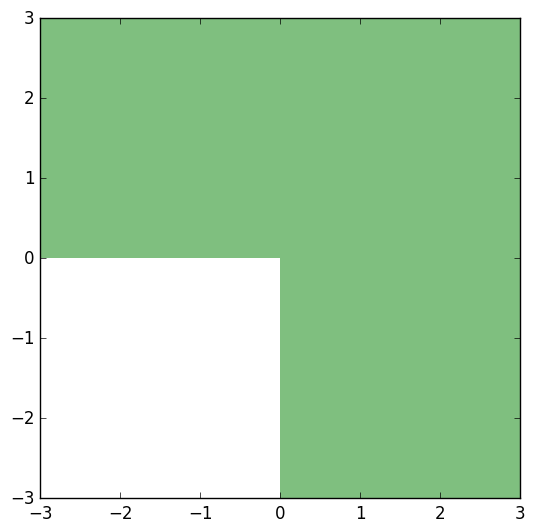

In [7]:
include("draw_boxes.jl")
draw(inner)

xlim(-3, 3)
ylim(-3, 3)
ax = gca()
ax[:set_aspect]("equal")

In [2]:
S9a = @constraint -1 <= x + y <= 1
S9b = @constraint -1 <= x - y <= 1
S9 = S9a ∩ S9b

Separator:
  - variables: [:x,:y]

In [3]:
x = y = -3..3

[-3, 3]

In [4]:
S9((x,y))

(([-3, 3],[-3, 3]),([-3, 3],[-3, 3]))

In [10]:
@time inner, boundary = pave(S9, IntervalBox(-10^8..10^8, -10^8..10^8), 0.01);

  0.116705 seconds (766.33 k allocations: 29.160 MB, 8.13% gc time)


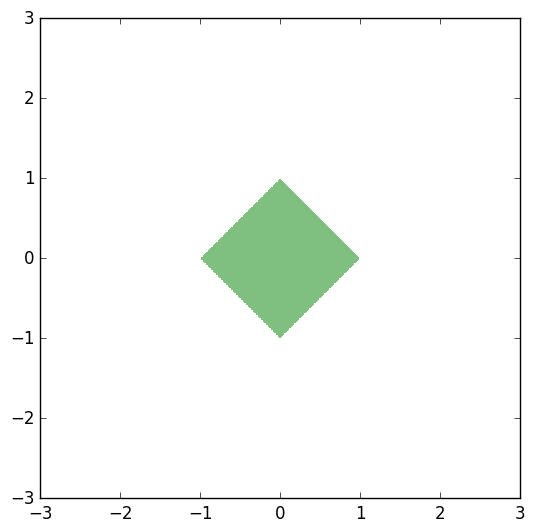

In [11]:
include("draw_boxes.jl")

draw(inner)

xlim(-3, 3)
ylim(-3, 3)
ax = gca()
ax[:set_aspect]("equal")

## Disjoint regions

In [31]:
include("draw_boxes.jl")

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


draw (generic function with 13 methods)

In [34]:
S10a = @constraint (x-2)^2 + y^2 <= 1
S10b = @constraint x^2 + (y-2)^2 <= 1
S10 = S10a ∪ S10b

Separator with variables x, y

In [38]:
X = IntervalBox(-10^4..10^4, -10^4..10^4)

@time paving = pave(S10, X, 1);

  0.028110 seconds (64.43 k allocations: 2.185 MB, 18.10% gc time)


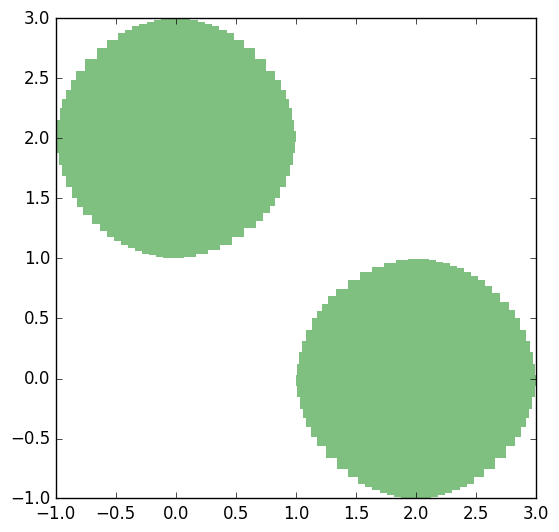

(-0.9980449639169569,2.9980449639169566,-0.9981672658552772,2.998167265855277)

In [42]:
@time refine!(paving, 0.1)
draw(paving.inner)

In [8]:
S10c = @constraint (x-1)^2 + (y-1)^2 <= 1
S11 = S10a ∪ S10b ∪ S10c
@time inner, boundary = pave(S11, X, 0.01);

  1.846274 seconds (13.69 M allocations: 416.454 MB, 14.07% gc time)


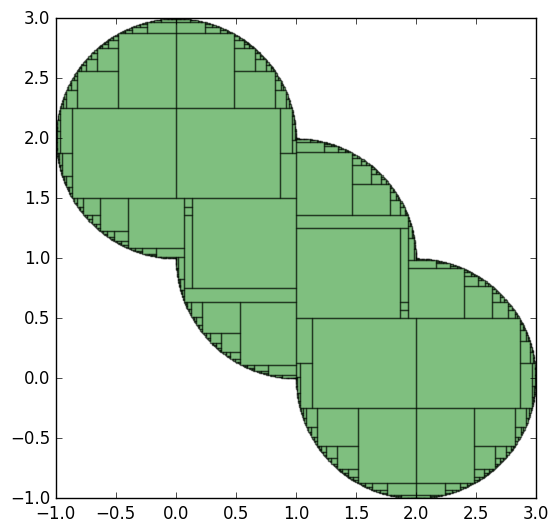

(-0.9999923705763645,2.9999923705763645,-0.9999713893612233,2.999971389361223)

In [11]:
draw(inner, "green", 0.5, 1)

In [9]:
expand(:(S10a ∪ S10b ∪ S10c))

:((S10a ∪ S10b) ∪ S10c)

  1.273488 seconds (8.97 M allocations: 269.566 MB, 14.99% gc time)


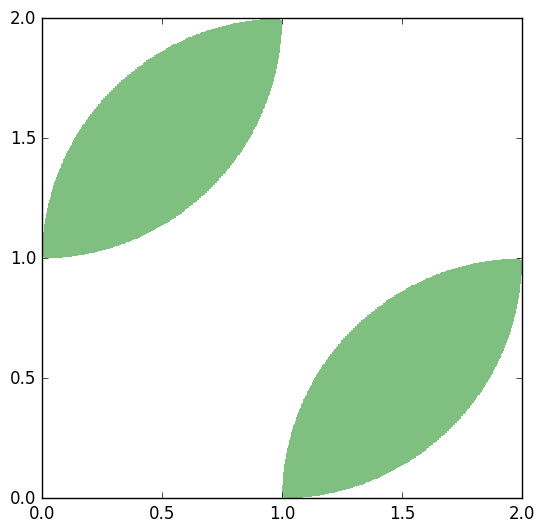

(9.155692571038987e-5,1.999908443074289,0.0001220777639902998,1.9998779222360095)

In [13]:
S12 = (S10a ∩ S10c) ∪ (S10b ∩ S10c)
@time inner, boundary = pave(S12, X, 0.01);
draw(inner)

## Cusp

In [26]:
sqrt(3)

1.7320508075688772

In [29]:
S13a = @constraint x^2 + y^2 <= 1
S13b = @constraint (x-2)^2 + y^2 <= 1
S13c = @constraint (x-1)^2 + (y-1.732050807568877)^2 <= 1


S13 = !(S13a ∪ S13b ∪ S13c)
X = IntervalBox(-0..2, -0..2)
@time inner, boundary = pave(S13, X, 0.001);

  8.317151 seconds (59.83 M allocations: 1.786 GB, 13.88% gc time)


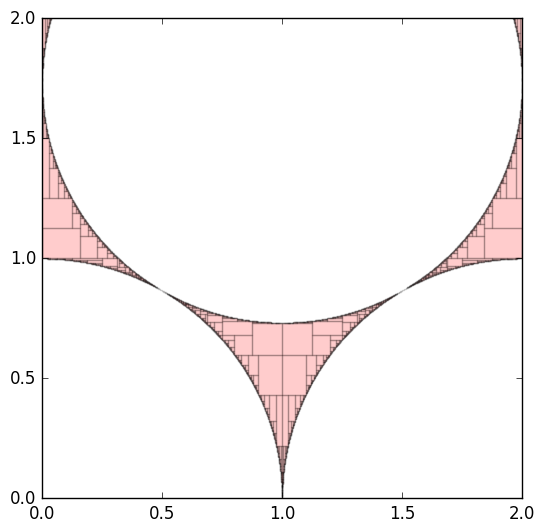

(0.0,2.0000000000000004,-2.7755575615628914e-17,2.0)

In [32]:
draw(inner, "red", 0.2, 1)
draw(boundary, "grey", 0.2, 1)